# Machine Learning using Python 
## Exam – Paper 2

### Part I: Unsupervised Learning

### Importing necessay Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
df=pd.read_csv("credit_card.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Understanding the data

In [5]:
df.shape

(8950, 18)

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [9]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


<AxesSubplot:>

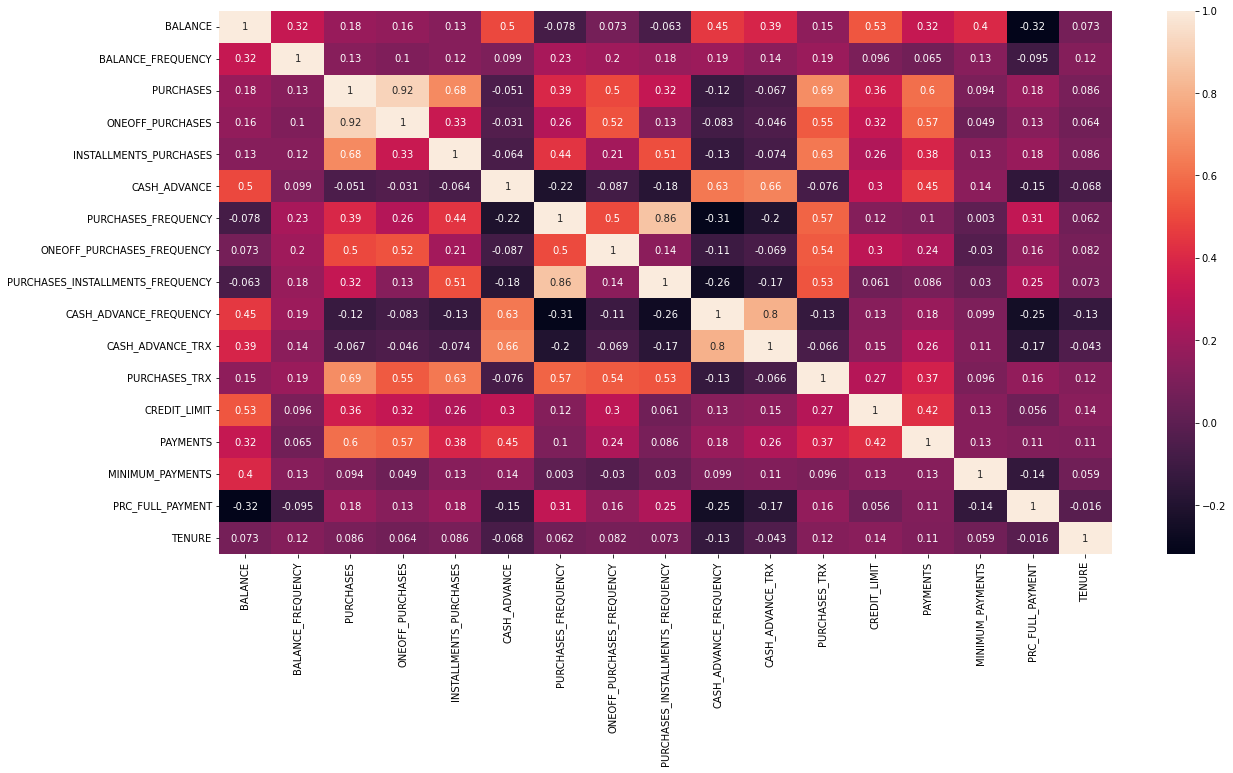

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

### Q1. What does the primary analysis of several categorical features reveal?

#### There are no categorical features in the given dataset

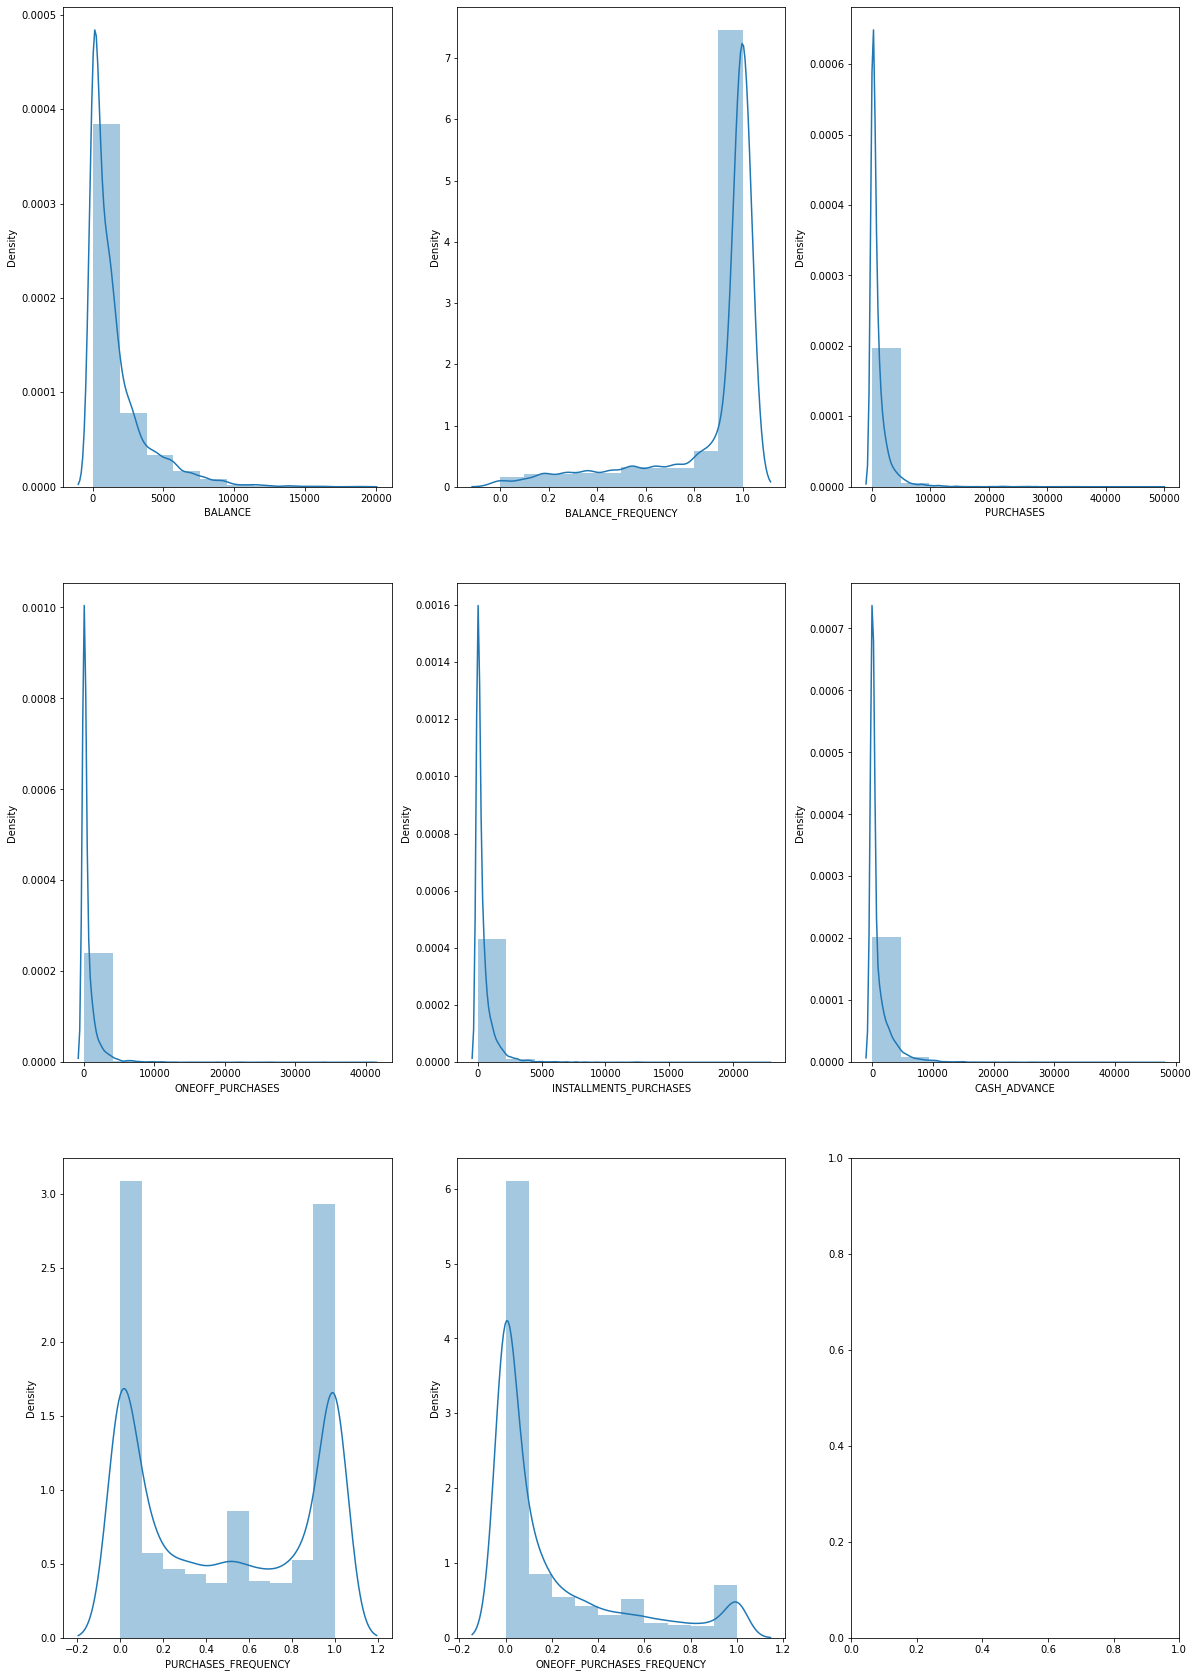

In [11]:
f, ax = plt.subplots(3,3, figsize=(20,30))
vis1 = sns.distplot(df["BALANCE"],bins=10, ax= ax[0,0])
vis2 = sns.distplot(df["BALANCE_FREQUENCY"],bins=10, ax=ax[0,1])
vis3 = sns.distplot(df["PURCHASES"],bins=10, ax= ax[0,2])
vis4 = sns.distplot(df["ONEOFF_PURCHASES"],bins=10, ax=ax[1,0])
vis5 = sns.distplot(df["INSTALLMENTS_PURCHASES"],bins=10, ax= ax[1,1])
vis6 = sns.distplot(df["CASH_ADVANCE"],bins=10, ax=ax[1,2])
vis7 = sns.distplot(df["PURCHASES_FREQUENCY"],bins=10, ax= ax[2,0])
vis8 = sns.distplot(df["ONEOFF_PURCHASES_FREQUENCY"],bins=10, ax=ax[2,1])
f.savefig('subplot.png')

### Q2. Perform the following Exploratory Data Analysis tasks:
### a. Missing Value Analysis
### b. Outlier Treatment using the Z-score method
### c. Deal with correlated variables

In [12]:
df1=df.copy()

In [13]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Replacing missing values using mean

In [14]:
df['CREDIT_LIMIT'].fillna(int(df['CREDIT_LIMIT'].mean()), inplace=True)

In [15]:
df['MINIMUM_PAYMENTS'].fillna(int(df['MINIMUM_PAYMENTS'].mean()), inplace=True)

In [16]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
df.drop(['CUST_ID'], axis = 1,inplace=True)

In [18]:
outlier=df.select_dtypes(['number'])

<AxesSubplot:>

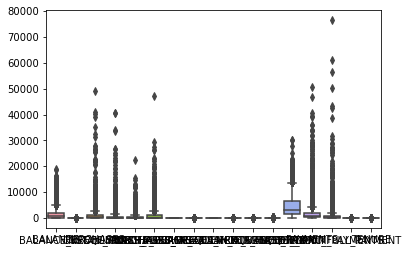

In [19]:
sns.boxplot(data=df)

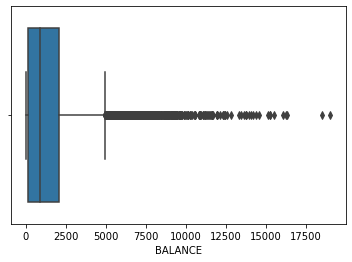

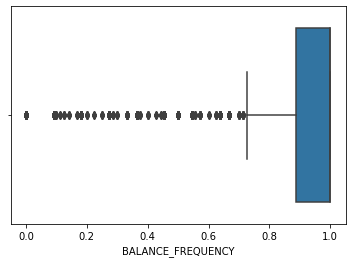

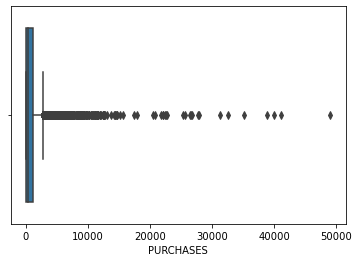

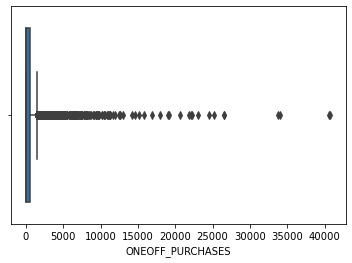

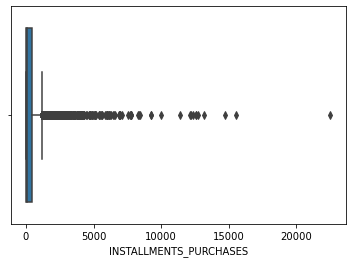

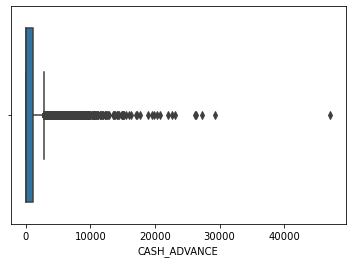

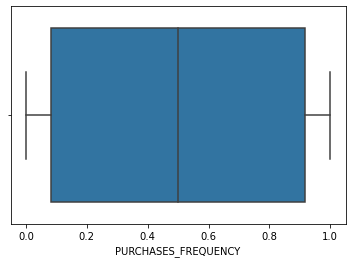

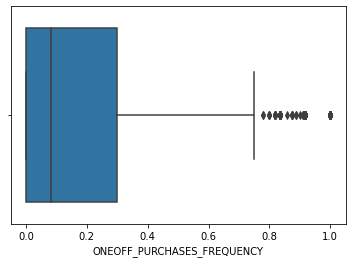

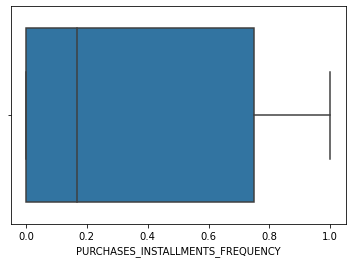

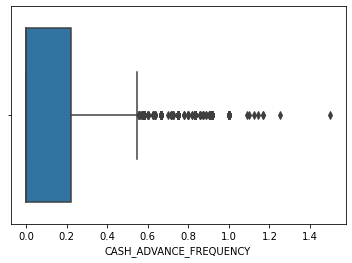

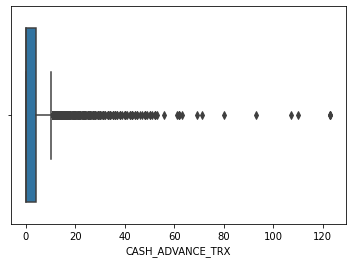

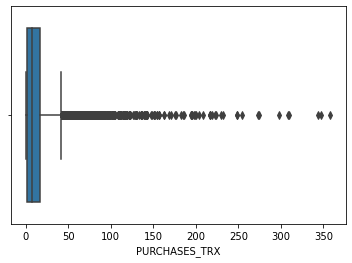

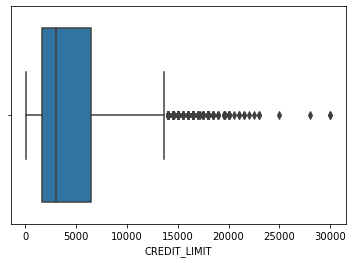

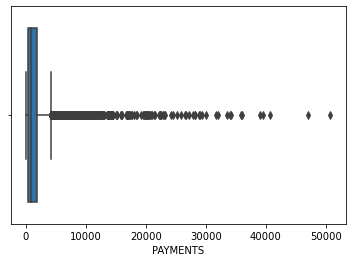

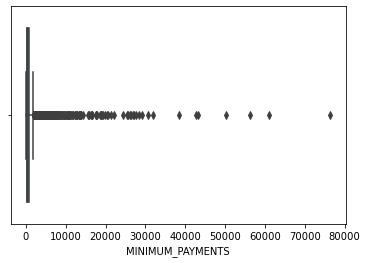

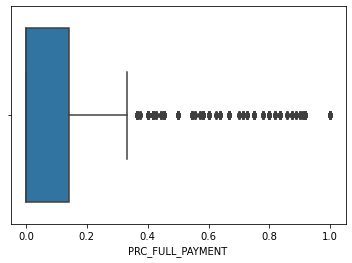

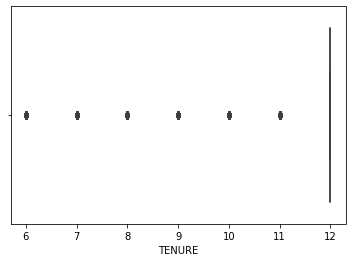

In [20]:
for column in outlier:
    plt.figure()
    sns.boxplot(x=column,data=outlier)

### b. Outlier Treatment using the Z-score method

In [21]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.731989           0.249434   0.424900          0.356934   
1     0.786961           0.134325   0.469552          0.356934   
2     0.447135           0.518084   0.107668          0.108889   
3     0.049099           1.016953   0.232058          0.546189   
4     0.358775           0.518084   0.462063          0.347294   
...        ...                ...        ...               ...   
8945  0.737950           0.518084   0.333293          0.356934   
8946  0.742423           0.518084   0.329136          0.356934   
8947  0.740398           0.185477   0.401965          0.356934   
8948  0.745174           0.185477   0.469552          0.356934   
8949  0.572575           0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349079      0.466786             0.806490   
1                   0.454576      2.605605             1.221758   
2     

In [22]:
df1 = pd.DataFrame(df[(z < 3).all(axis=1)], columns = df.columns)

<AxesSubplot:>

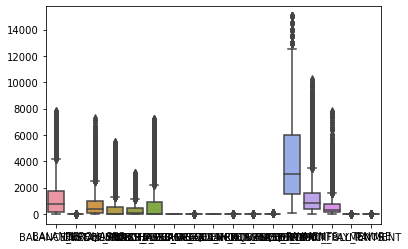

In [23]:
sns.boxplot(data=df1)

### c. Deal with correlated variables

<AxesSubplot:>

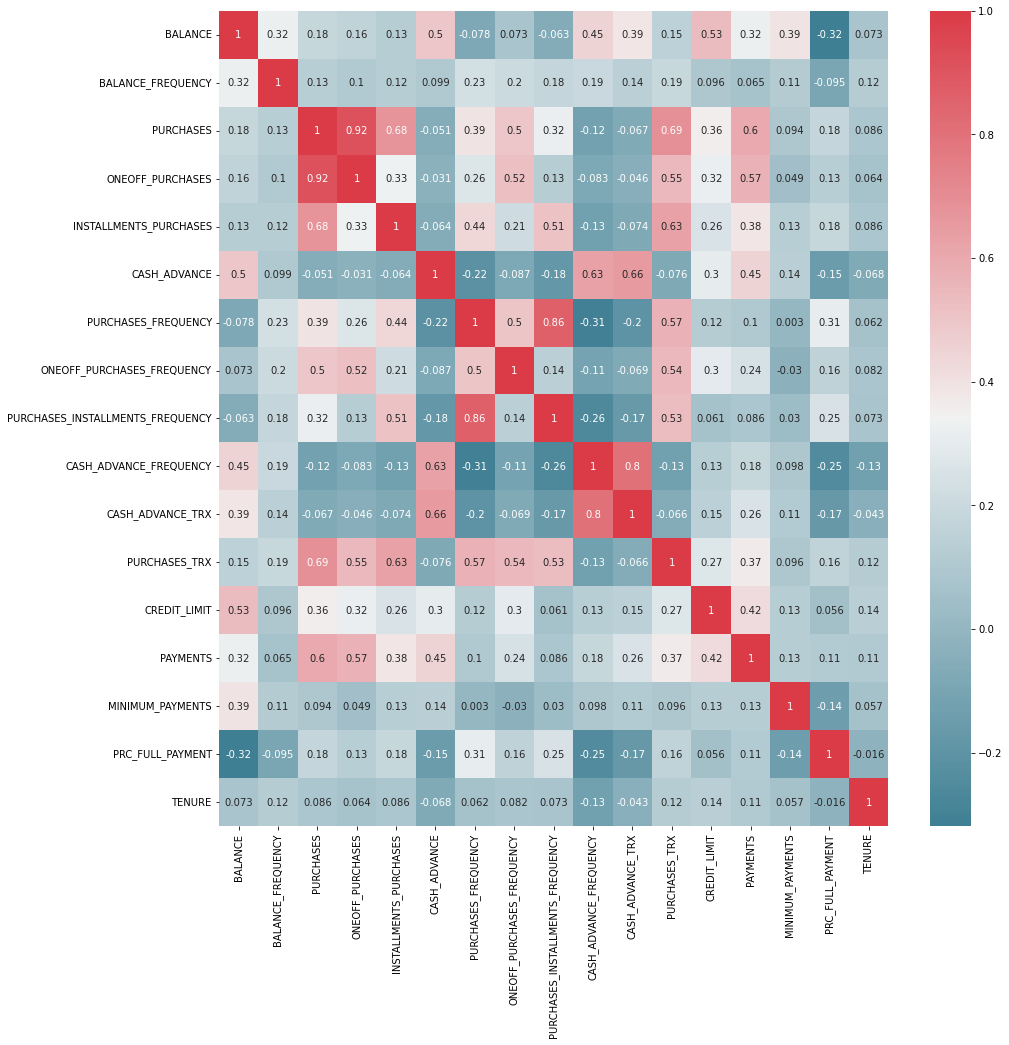

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot = True, cmap=cmap)

In [25]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [26]:
high_corr_var

[('PURCHASES', 'ONEOFF_PURCHASES'),
 ('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY')]

### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [27]:
from sklearn.decomposition import PCA

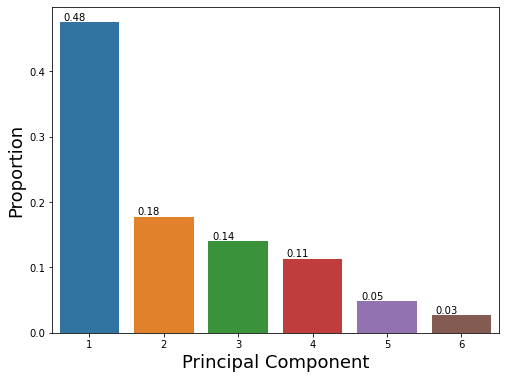

In [28]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

No handles with labels found to put in legend.


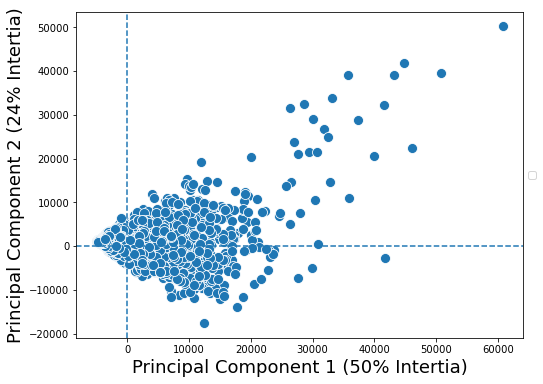

In [29]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

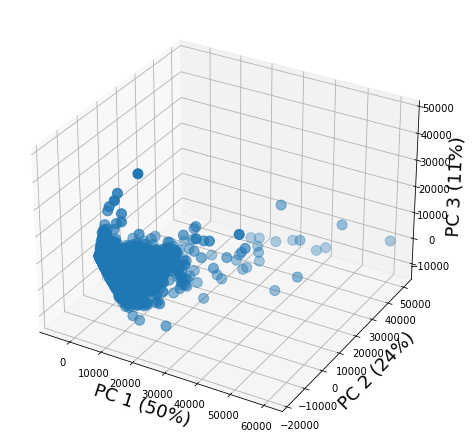

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6)) 
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], s=100, cmap="Set1")
ax.set_xlabel('PC 1 (50%)',fontsize=18)
ax.set_ylabel('PC 2 (24%)',fontsize=18)
ax.set_zlabel('PC 3 (11%)',fontsize=18) 
plt.show()

### Build a model with multiple k

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df)
          score=silhouette_score(df,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.5116394454786315)
(for n_clusters=5,silhouette_score  is 0.3998606898546656)
(for n_clusters=6,silhouette_score  is 0.4088276878303396)
(for n_clusters=7,silhouette_score  is 0.3700412970721864)
(for n_clusters=8,silhouette_score  is 0.3816968297205202)


### Plot the elbow curve

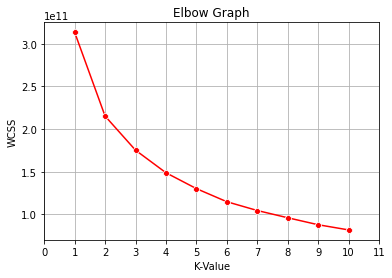

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(df1)
df1=scale.transform(df1)
df_scaled=pd.DataFrame(df1)
df_scaled.head()


from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[4,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df_scaled)
          score=silhouette_score(df_scaled,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=4,silhouette_score  is 0.1838542228099797)
(for n_clusters=5,silhouette_score  is 0.18397870485757833)
(for n_clusters=6,silhouette_score  is 0.19081484310564464)
(for n_clusters=7,silhouette_score  is 0.1987091399790942)
(for n_clusters=8,silhouette_score  is 0.20222946144049583)


## Part II - Deep learning

### Load dataset

In [40]:
sent=pd.read_csv("Sentiment.csv")

In [41]:
sent.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [42]:
sent.shape

(13871, 21)

In [43]:
sent.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [54]:
sent.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [55]:
sent=sent.fillna(sent.mode().iloc[0])

In [56]:
sent.isnull().sum()

id                           0
candidate                    0
candidate_confidence         0
relevant_yn                  0
relevant_yn_confidence       0
sentiment                    0
sentiment_confidence         0
subject_matter               0
subject_matter_confidence    0
candidate_gold               0
name                         0
relevant_yn_gold             0
retweet_count                0
sentiment_gold               0
subject_matter_gold          0
text                         0
tweet_coord                  0
tweet_created                0
tweet_id                     0
tweet_location               0
user_timezone                0
dtype: int64

###  Q.1 Total Number of Positive and Negative sentiments

In [57]:
sent['sentiment'].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [58]:
test_pos = sent[sent['sentiment'] == 'Positive']

In [59]:
test_neg = sent[sent['sentiment'] == 'Negative']

In [60]:
print('No.of Positive sentiments :',len(test_pos))
print('No.of Negative sentiments :',len(test_neg))

No.of Positive sentiments : 2236
No.of Negative sentiments : 8493


### Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [61]:
data = sent[['text','sentiment']]

In [62]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

NameError: name 'Tokenizer' is not defined